   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

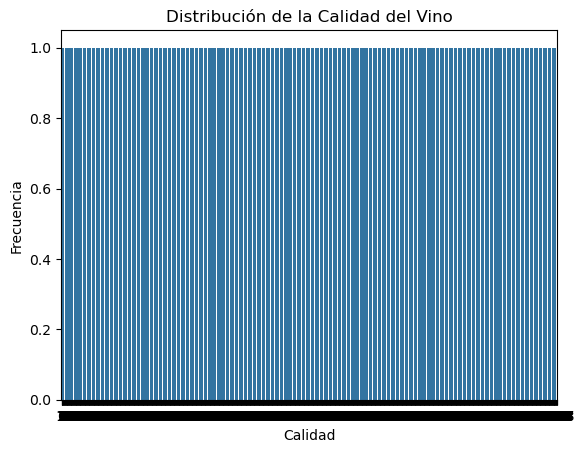

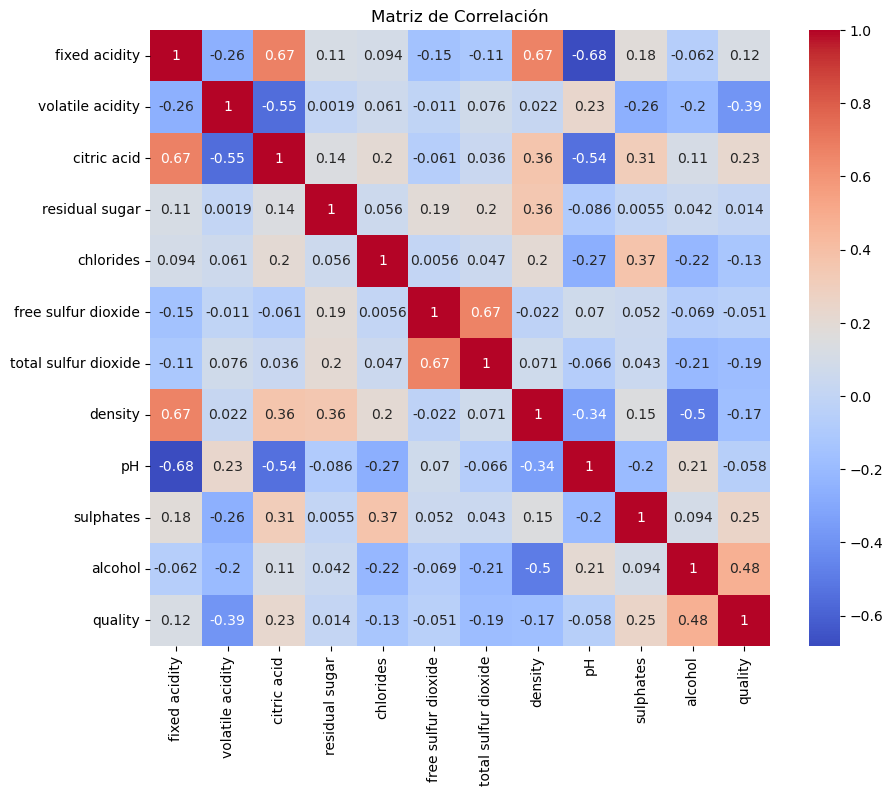

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar el dataset
file_path = r'C:\Users\SM ZONA GAMER\Documents\UNAD\wine\winequality-red.csv'
data = pd.read_csv(file_path)

# Ver las primeras filas del dataframe
print(data.head())

# Información del dataframe
print(data.info())

# Estadísticas descriptivas
print(data.describe())

# Comprobar valores nulos
print(data.isnull().sum())

# Visualización de la distribución de la calidad del vino
sns.countplot(data['quality'])
plt.title('Distribución de la Calidad del Vino')
plt.xlabel('Calidad')
plt.ylabel('Frecuencia')
plt.show()

# Matriz de correlación
plt.figure(figsize=(10, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()


In [26]:
# Reemplazar valores faltantes si los hay (en este dataset, generalmente no deberían haber)
# data.fillna(data.mean(), inplace=True)

# Escalar características si es necesario (aquí puedes usar MinMaxScaler o StandardScaler)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(data.drop('quality', axis=1))
X = pd.DataFrame(scaled_features, columns=data.columns[:-1])  # todas menos la columna de calidad
y = data['quality']


In [28]:
from sklearn.feature_selection import SelectKBest, f_regression

# Seleccionar las mejores características
selector = SelectKBest(score_func=f_regression, k='all')
selector.fit(X, y)

# Ver las puntuaciones
scores = pd.DataFrame({'Feature': X.columns, 'Score': selector.scores_})
print(scores.sort_values(by='Score', ascending=False))


                 Feature       Score
10               alcohol  468.267011
1       volatile acidity  287.444450
9              sulphates  107.740433
2            citric acid   86.257726
6   total sulfur dioxide   56.657818
7                density   50.405223
4              chlorides   26.985608
0          fixed acidity   24.960038
8                     pH    5.340462
5    free sulfur dioxide    4.108502
3         residual sugar    0.301184


In [30]:
from sklearn.model_selection import train_test_split

# Dividir los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [32]:
from sklearn.tree import DecisionTreeClassifier

# Crear el modelo
model = DecisionTreeClassifier(random_state=42)

# Entrenar el modelo
model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [34]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Hacer predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
print("Precisión:", accuracy_score(y_test, y_pred))
print("Reporte de Clasificación:\n", classification_report(y_test, y_pred))
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred))


Precisión: 0.5625
Reporte de Clasificación:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.11      0.10      0.11        10
           5       0.64      0.68      0.66       130
           6       0.54      0.53      0.54       132
           7       0.51      0.50      0.51        42
           8       0.00      0.00      0.00         5

    accuracy                           0.56       320
   macro avg       0.30      0.30      0.30       320
weighted avg       0.56      0.56      0.56       320

Matriz de Confusión:
 [[ 0  0  0  1  0  0]
 [ 0  1  4  5  0  0]
 [ 1  3 88 36  2  0]
 [ 0  4 39 70 17  2]
 [ 0  1  5 14 21  1]
 [ 0  0  1  3  1  0]]


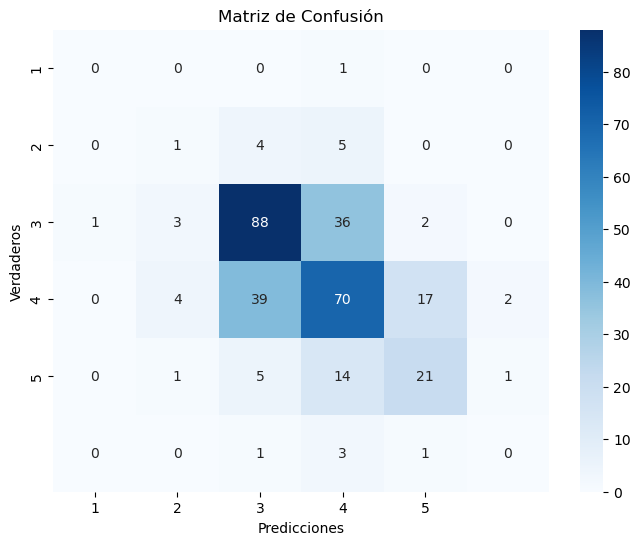

In [36]:
# Gráfica de la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', 
            xticklabels=[1, 2, 3, 4, 5], yticklabels=[1, 2, 3, 4, 5])
plt.ylabel('Verdaderos')
plt.xlabel('Predicciones')
plt.title('Matriz de Confusión')
plt.show()


In [44]:
# Paso 8: Interpretar, analizar y documentar los resultados

# Análisis de las métricas de desempeño
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(" Análisis de Desempeño del Modelo ")
print(f"Precisión del modelo: {accuracy:.2f}")
print("\nReporte de Clasificación:\n", report)

# Interpretación de la precisión
if accuracy > 0.80:
    print("El modelo tiene una alta precisión, lo que indica que es eficaz para clasificar la calidad del vino.")
elif accuracy > 0.60:
    print("El modelo tiene una precisión moderada. Puede que necesite ajustes adicionales o más datos para mejorar.")
else:
    print("El modelo tiene una baja precisión, lo que sugiere que no está clasificando correctamente la calidad del vino.")

# Análisis de la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print("\n### Análisis de la Matriz de Confusión ###")
print("Matriz de Confusión:\n", conf_matrix)

# Calcular métricas adicionales por clase
for i in range(conf_matrix.shape[0]):
    tn = conf_matrix.sum() - conf_matrix[i, :].sum() - conf_matrix[:, i].sum() + conf_matrix[i, i]
    fp = conf_matrix[:, i].sum() - conf_matrix[i, i]
    fn = conf_matrix[i, :].sum() - conf_matrix[i, i]
    tp = conf_matrix[i, i]
    
    sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    
    print(f"\nClase: {i}")
    print(f"Verdaderos Positivos (TP): {tp}")
    print(f"Falsos Positivos (FP): {fp}")
    print(f"Falsos Negativos (FN): {fn}")
    print(f"Verdaderos Negativos (TN): {tn}")
    print(f"Sensibilidad (Recall): {sensitivity:.2f}")
    print(f"Especificidad: {specificity:.2f}")
    print(f"Precisión (Precision): {precision:.2f}")

# Resumen de las conclusiones
print("\n Conclusiones ")
print("El modelo de Árboles de Decisión proporciona una forma efectiva de clasificar la calidad del vino basado en sus características químicas.")
print("Los resultados muestran que la sensibilidad es importante para minimizar falsos negativos, especialmente si la calidad inferior del vino es crítica.")
print("Se recomienda ajustar los hiperparámetros del modelo y explorar otros algoritmos para mejorar el desempeño.")




 Análisis de Desempeño del Modelo 
Precisión del modelo: 0.56

Reporte de Clasificación:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.11      0.10      0.11        10
           5       0.64      0.68      0.66       130
           6       0.54      0.53      0.54       132
           7       0.51      0.50      0.51        42
           8       0.00      0.00      0.00         5

    accuracy                           0.56       320
   macro avg       0.30      0.30      0.30       320
weighted avg       0.56      0.56      0.56       320

El modelo tiene una baja precisión, lo que sugiere que no está clasificando correctamente la calidad del vino.

### Análisis de la Matriz de Confusión ###
Matriz de Confusión:
 [[ 0  0  0  1  0  0]
 [ 0  1  4  5  0  0]
 [ 1  3 88 36  2  0]
 [ 0  4 39 70 17  2]
 [ 0  1  5 14 21  1]
 [ 0  0  1  3  1  0]]

Clase: 0
Verdaderos Positivos (TP): 0
Falsos Positivos (FP): 1